# *Análise e predição de preços da CVCB3*

In [1]:
#descomente as linhas abaixo e execute-a para instalar os pacotes cufflinks e fbprophet

#pip install cufflinks 
#pip install streamlit
#pip install pandas-datareader

In [2]:
#!conda install -c conda-forge fbprophet -y

In [3]:
#!pip install --upgrade plotly

In [22]:
import pandas as pd
import matplotlib as plt
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
from fbprophet.plot import plot_plotly as fb
import pandas_datareader as wb
import streamlit as st
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### 1. Carregando o conjunto de dados

In [23]:
df = wb.DataReader(['CVCB3.SA'], data_source ='yahoo',start='2012-01-01',end='2021-11-29')
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,CVCB3.SA,CVCB3.SA,CVCB3.SA,CVCB3.SA,CVCB3.SA,CVCB3.SA
Date,,,,,,
2013-12-09,13.736099,15.550000,15.60,15.01,15.52,3608000.0
2013-12-10,14.045274,15.900000,16.00,15.33,15.33,760200.0
2013-12-11,13.912769,15.750000,15.99,15.51,15.94,776800.0
2013-12-12,13.691934,15.500000,15.90,15.41,15.90,529600.0
2013-12-13,13.691934,15.500000,15.68,15.22,15.25,309200.0
...,...,...,...,...,...,...
2021-11-23,15.390000,15.390000,15.39,14.55,14.91,11098700.0
2021-11-24,15.730000,15.730000,15.90,14.94,15.01,7921900.0


## Visualização de Dados

array([[<AxesSubplot:title={'center':"('Adj Close', 'CVCB3.SA')"}>,
        <AxesSubplot:title={'center':"('Close', 'CVCB3.SA')"}>],
       [<AxesSubplot:title={'center':"('High', 'CVCB3.SA')"}>,
        <AxesSubplot:title={'center':"('Low', 'CVCB3.SA')"}>],
       [<AxesSubplot:title={'center':"('Open', 'CVCB3.SA')"}>,
        <AxesSubplot:title={'center':"('Volume', 'CVCB3.SA')"}>]],
      dtype=object)

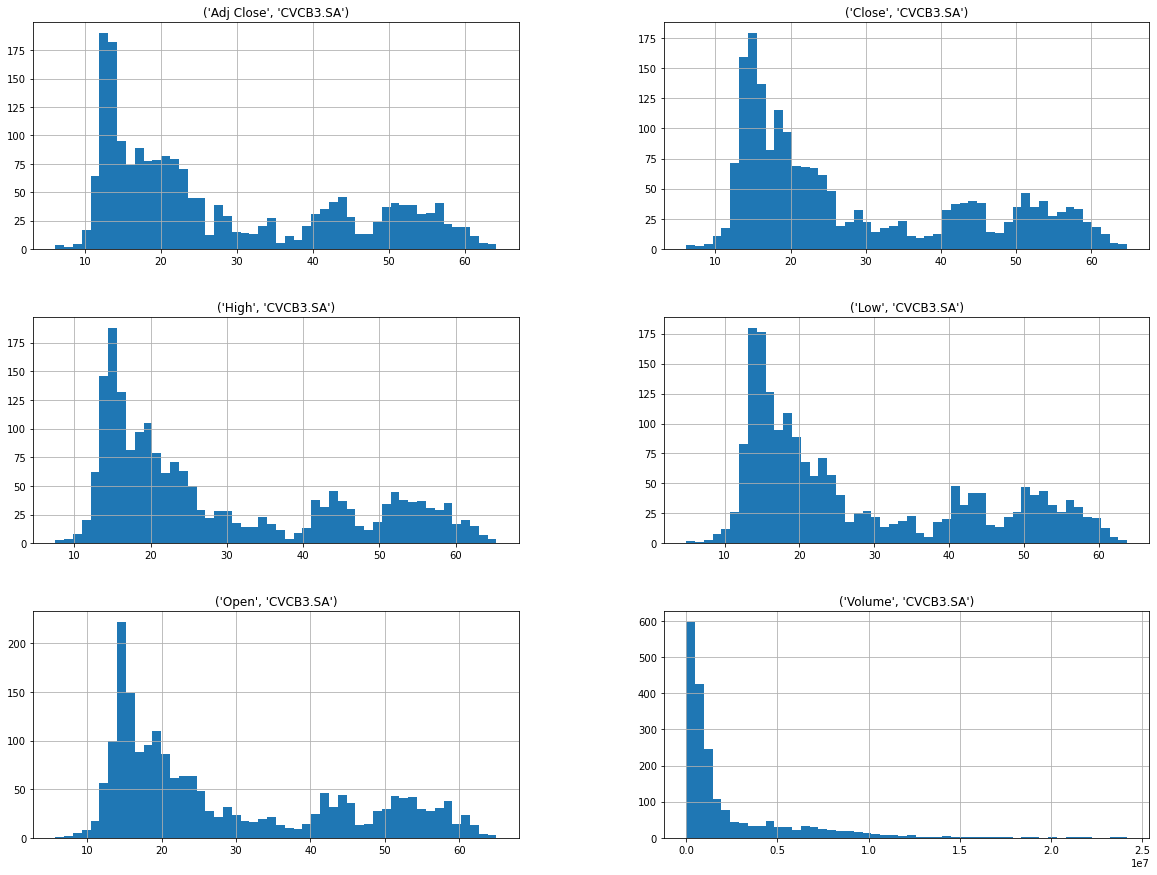

In [24]:
df.hist(bins=50,figsize=(20,15))

In [25]:
df['Adj Close'].iplot()

In [26]:
df.corr()

,Attributes,Adj Close,Close,High,Low,Open,Volume
,Symbols,CVCB3.SA,CVCB3.SA,CVCB3.SA,CVCB3.SA,CVCB3.SA,CVCB3.SA
Attributes,Symbols,,,,,,
Adj Close,CVCB3.SA,1.000000,0.999418,0.999215,0.998812,0.998407,-0.143084
Close,CVCB3.SA,0.999418,1.000000,0.999501,0.999496,0.998891,-0.167917
High,CVCB3.SA,0.999215,0.999501,1.000000,0.999384,0.999498,-0.158478
Low,CVCB3.SA,0.998812,0.999496,0.999384,1.000000,0.999406,-0.175898
Open,CVCB3.SA,0.998407,0.998891,0.999498,0.999406,1.000000,-0.169221
Volume,CVCB3.SA,-0.143084,-0.167917,-0.158478,-0.175898,-0.169221,1.000000


## Modelo utilizando ARIMA